In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
sys.path.append('/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/src')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/data')
import py37_cplex2210 as cplex
from generator import *

In [2]:
%reload_ext autoreload
%autoreload 2
from frontal_algo_no_beta import *
#from Frank_Wolfe_st_v2 import *
from Frank_Wolfe_st_v3 import *
from Frank_Wolfe_st_v4 import *
from tools import *

In [4]:
nb_test=4
nk=20
n_pre=50
K=1000
global_result_v3=[]
global_time_v3=[]
global_result_v4=[]
global_time_v4=[]
N=200
actual_time=0
max_time=1200

for i in range(nb_test):
    np.random.seed(i)
    instance_json(N)
    my_instance = "../data/instance_" + str(N) + ".json"
    frontal = Frontal(my_instance,actual_time)
    result,s_t_min,soc_max,optimal_value = frontal.Frontal_solve(actual_time)
    
    np.random.seed(0)
    standard_v3_t = Frank_Wolfe_Standard_v3(my_instance)
    x_bar_k_v3_t,df_v3_t=standard_v3_t.FW_st_solve(actual_time, analyse=True, K=K, nk=nk,n_pre=n_pre,active_criterion="time",max_time=max_time)
    global_result_v3.append(optimal_value-df_v3_t['best_score'].values)
    global_time_v3.append(df_v3_t['time_elapsed'].values)
    np.random.seed(0)
    standard_v4_t = Frank_Wolfe_Standard_v4(my_instance)
    x_bar_k_v4_t,df_v4_t=standard_v4_t.FW_st_solve(actual_time, analyse=True, K=K, nk=nk,n_pre=n_pre,active_criterion="time",max_time=max_time)
    global_result_v4.append(optimal_value-df_v4_t['best_score'].values)
    global_time_v4.append(df_v4_t['time_elapsed'].values)

valeur optimal par function objective: 2096.5282825966756


100%|██████████| 1000/1000 [22:06<00:00,  1.33s/iteration]


Gap primal dual :  157.09276724534175
Objective value is :  2096.75689608341


23930iteration [21:46, 18.31iteration/s]

Gap primal dual :  0.17468976483860388
Objective value is :  2096.528283002553


valeur optimal par function objective: 2103.2039618040694


 74%|███████▍  | 740/1000 [21:45<07:38,  1.76s/iteration]


Gap primal dual :  27.909878668129295
Objective value is :  2103.206055421193


23790iteration [21:50, 18.16iteration/s]


Gap primal dual :  0.1760511633879105
Objective value is :  2103.2039620003325
valeur optimal par function objective: 2094.889326130027


 79%|███████▉  | 790/1000 [21:59<05:50,  1.67s/iteration]


Gap primal dual :  195.69942926916974
Objective value is :  2095.338701122413


13380iteration [23:03,  9.67iteration/s]


Gap primal dual :  0.17526682429161156
Objective value is :  2094.8893266927175
valeur optimal par function objective: 2107.538663711695


 87%|████████▋ | 870/1000 [21:59<03:17,  1.52s/iteration]


Gap primal dual :  3.2952198439247695
Objective value is :  2107.5386929092288


15440iteration [21:47, 11.81iteration/s]

Gap primal dual :  0.5086061365627756
Objective value is :  2107.5393071794633


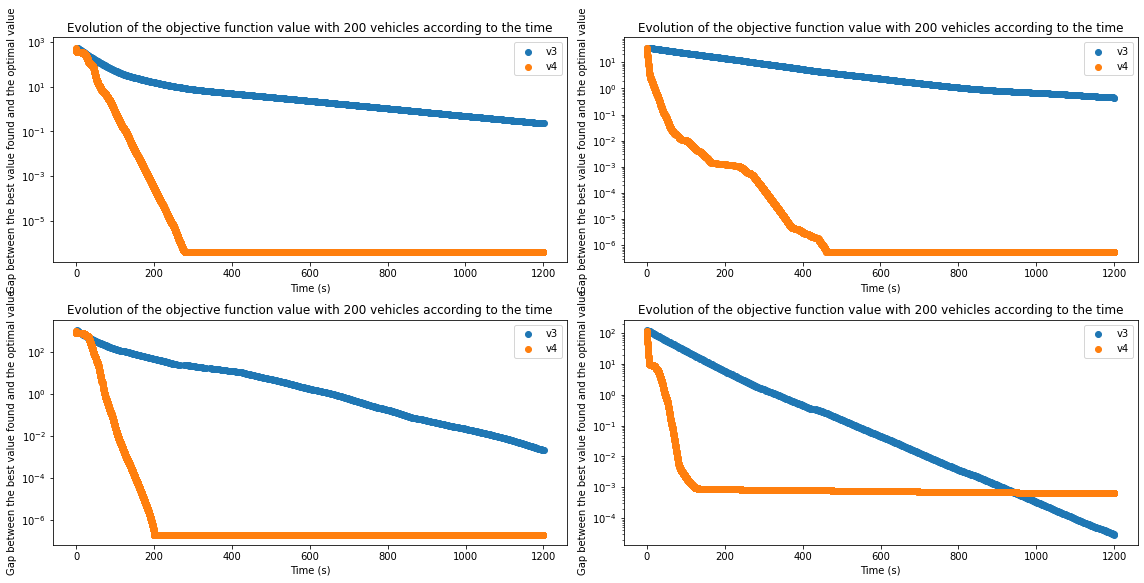

In [24]:
fig, axes = plt.subplots(2,2, figsize=(16, 8 ))

cpt=0
# Plot on each subplot
axes_y=0
for i in range(nb_test):
    #np.random.seed(0)
    #frontal = Frontal(my_instance,actual_time, nb_ev=nb, nb_before=N)
    #result,s_t_min,soc_max = frontal.Frontal_solve(actual_time)
    #axes[cpt][axes_y].set_title("Evolution of the objective function value with "+str(nb)+" vehicles")
    #axes[i][axes_y].set_xlabel("Iteration")
    #axes[i][axes_y].set_ylabel("Objective function value")
    #axes[i][axes_y].scatter(global_time_v3[i],global_result_v3[i],label="v3")
    #axes[i][axes_y].scatter(global_time_v4[i],global_result_v4[i],label="v4")
    axes[cpt][axes_y].set_yscale('log')
    axes[cpt][axes_y].scatter(global_time_v3[i][50:],-global_result_v3[i][50:],label="v3")
    axes[cpt][axes_y].scatter(global_time_v4[i][50:],-global_result_v4[i][50:],label="v4")
    axes[cpt][axes_y].set_title("Evolution of the objective function value with "+str(N)+" vehicles according to the time")
    axes[cpt][axes_y].set_xlabel("Time (s)")
    axes[cpt][axes_y].set_ylabel("Gap between the best value found and the optimal value")
    axes[cpt][axes_y].legend()
    if (cpt+1)%2==0:
        axes_y+=1
        cpt=0
    else:
        cpt+=1

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

ValueError: x and y must be the same size

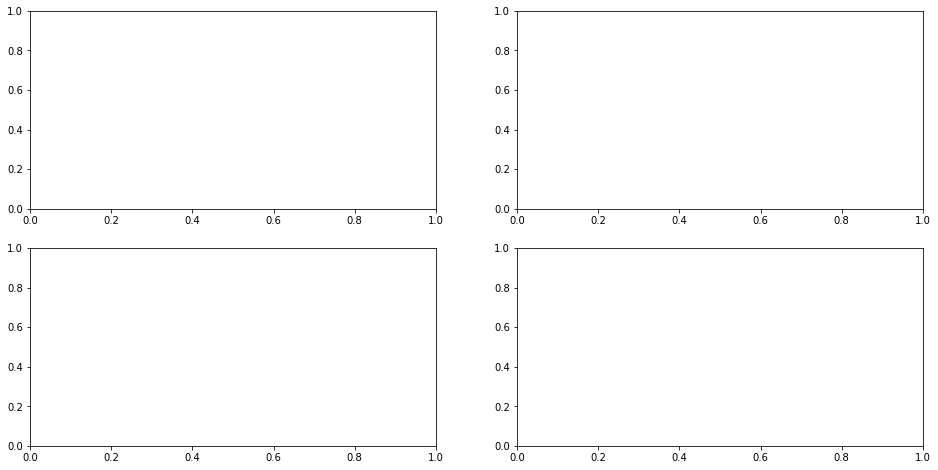

In [18]:
fig, axes = plt.subplots(2,2, figsize=(16, 8 ))

cpt=0
# Plot on each subplot
axes_y=0
for i in range(nb_test):
    #np.random.seed(0)
    #frontal = Frontal(my_instance,actual_time, nb_ev=nb, nb_before=N)
    #result,s_t_min,soc_max = frontal.Frontal_solve(actual_time)
    #axes[cpt][axes_y].set_title("Evolution of the objective function value with "+str(nb)+" vehicles")
    #axes[i][axes_y].set_xlabel("Iteration")
    #axes[i][axes_y].set_ylabel("Objective function value")
    #axes[i][axes_y].scatter(global_time_v3[i],global_result_v3[i],label="v3")
    #axes[i][axes_y].scatter(global_time_v4[i],global_result_v4[i],label="v4")
    
    axes[cpt][axes_y].scatter([i for i in range(len(global_time_v3[i][50:]))],-global_result_v3[i][50:],label="v3")
    axes[cpt][axes_y].scatter([i for i in range(len(global_time_v4[i][50:]))],-global_result_v4[i][50:],label="v4")
    axes[cpt][axes_y].set_title("Evolution of the objective function value with "+str(N)+" vehicles according to the time")
    axes[cpt][axes_y].set_xlabel("Time (s)")
    axes[cpt][axes_y].set_ylabel("Gap between the best value found and the optimal value")
    axes[cpt][axes_y].legend()
    if (cpt+1)%2==0:
        axes_y+=1
        cpt=0
    else:
        cpt+=1

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()